# Preparação dos dados

In [2]:
import pandas as pd

# Lê o arquivo .csv
df = pd.read_csv('ge_news.csv')

# Exibe as primeiras linhas
df.head()

,date,time,title,text,link,club
0,10/11/2022,19h55,Convocados do Uruguai para a Copa do Mundo 202...,O técnico Diego Alonso divulgou a lista dos 2...,https://ge.globo.com/futebol/copa-do-mundo/not...,athletico-pr
1,22/12/2017,10h04,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,https://globoesporte.globo.com/futebol/liberta...,athletico-pr
2,11/02/2018,08h00,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,https://globoesporte.globo.com/pr/futebol/time...,athletico-pr
3,18/12/2020,12h48,Athletico confirma fim de contrato com Welling...,A reportagem do ge já havia adiantado que as ...,https://globoesporte.globo.com/pr/futebol/time...,athletico-pr
4,13/09/2018,22h17,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",https://globoesporte.globo.com/pr/futebol/time...,athletico-pr


In [3]:
# Removendo simultaneamente as colunas de índice 0, 1, 4 (date, time and link)
column_indices = [0, 1, 4]
df.drop([df.columns[i] for i in column_indices], axis=1, inplace=True)

In [4]:
df.head()

,title,text,club
0,Convocados do Uruguai para a Copa do Mundo 202...,O técnico Diego Alonso divulgou a lista dos 2...,athletico-pr
1,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,athletico-pr
2,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,athletico-pr
3,Athletico confirma fim de contrato com Welling...,A reportagem do ge já havia adiantado que as ...,athletico-pr
4,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",athletico-pr


In [5]:
# Fundindo colunas 'title' e 'text' para a coluna 'title_and_text'
df['data'] = df['title'] + ' ' + df['text']

In [6]:
df.head()

,title,text,club,data
0,Convocados do Uruguai para a Copa do Mundo 202...,O técnico Diego Alonso divulgou a lista dos 2...,athletico-pr,Convocados do Uruguai para a Copa do Mundo 202...
1,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,athletico-pr,Conmebol divulga tabela detalhada da pré e da ...
2,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,athletico-pr,"Com assistência, Demethryus recebe elogios no ..."
3,Athletico confirma fim de contrato com Welling...,A reportagem do ge já havia adiantado que as ...,athletico-pr,Athletico confirma fim de contrato com Welling...
4,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",athletico-pr,"Alô, cartoleiros! Atlético-PR passa limpo cont..."


In [7]:
from sklearn.preprocessing import LabelEncoder

# Cria um objeto LabelEncoder
le = LabelEncoder()

# Fitting the encoder and transforming the 'Animals' column
df['label'] = le.fit_transform(df['club'])

In [8]:
# Removendo as três colunas originais, não precisamos mais delas
column_indices = [0, 1, 2]
df.drop([df.columns[i] for i in column_indices], axis=1, inplace=True)

In [9]:
df.head()

,data,label
0,Convocados do Uruguai para a Copa do Mundo 202...,0
1,Conmebol divulga tabela detalhada da pré e da ...,0
2,"Com assistência, Demethryus recebe elogios no ...",0
3,Athletico confirma fim de contrato com Welling...,0
4,"Alô, cartoleiros! Atlético-PR passa limpo cont...",0


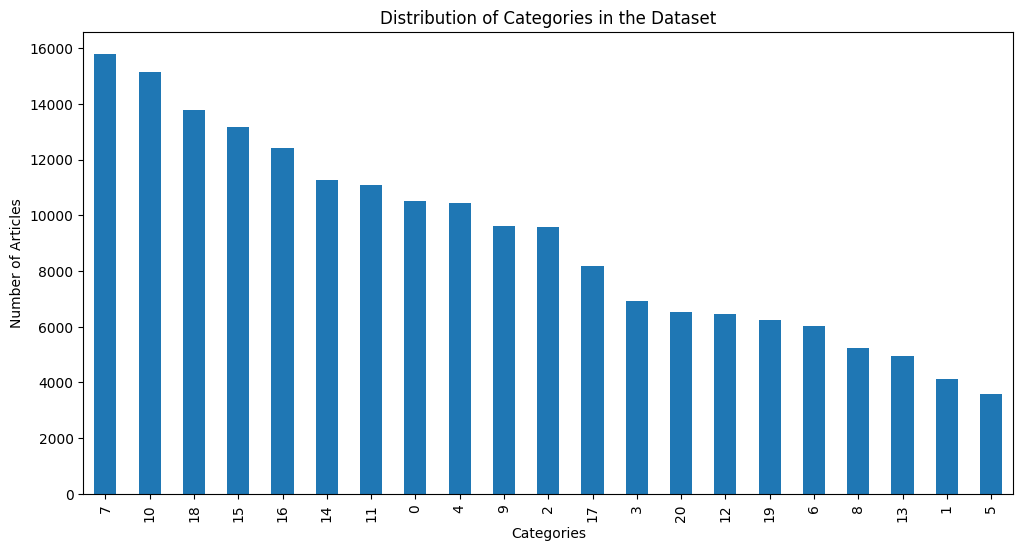

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `ds` and has columns 'data' and 'label'
category_counts = df['label'].value_counts()

# Plot the distribution of categories
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Number of Articles')
plt.title('Distribution of Categories in the Dataset')
plt.show()

# Pré-processamento

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [31]:
import string
from collections import defaultdict
from tqdm import tqdm

tqdm.pandas()

def preprocess_text(df, text_column):
    """
    Realiza o pré-processamento dos dados de texto em um DataFrame do Pandas.
    Remove pontuação, palavras comuns (stop words) e aplica lematização.
    """
    
    # Cria uma tabela de tradução que mapeia cada caractere de pontuação do módulo `string.punctuation` 
    # para `None` (ou seja, remove-os do texto).
    print("Removendo pontuação...")
    translator = str.maketrans('', '', string.punctuation) 
    df[text_column] = df[text_column].progress_apply(lambda x: x.translate(translator))
        
    # Usa o método `apply()` do Pandas DataFrame para aplicar o tokenizador `word_tokenize()` do NLTK 
    # a cada elemento da coluna `text_column` especificada em `df_clean` após converter cada elemento 
    # para letras minúsculas.
    print("Aplicando tokenização...")
    df[text_column] = df[text_column].progress_apply(lambda x: word_tokenize(x.lower()))

    # Remove palavras comuns (stop words)
    print("Removendo stopwords...")
    stop_words = set(stopwords.words('portuguese'))
    df[text_column] = df[text_column].progress_apply(lambda x: [word for word in x if word not in stop_words])
       
    def get_wordnet_pos(tag):
        """
        Mapeia a tag POS (classe gramatical) para o primeiro caractere usado pelo WordNetLemmatizer
        """
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    
    def lemmatize_words(words):
        lemmatizer = WordNetLemmatizer()
        pos_tagged_words = nltk.pos_tag(words)
        return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tagged_words]
    
    # Retorna o valor correspondente à tag POS da palavra, usando o dicionário de mapeamento criado acima
    print("Computando Lematização...")
    df[text_column] = df[text_column].progress_apply(lemmatize_words)

In [ ]:
preprocess_text(df, 'data')

In [1]:
# Salvar em formato pickle
df.to_pickle("ge.pkl")

df

NameError: name 'df' is not defined

In [1]:
import pandas as pd

df = pd.read_pickle("ge.pkl")

# Treinando modelo Word2vec

In [2]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

In [3]:
# Custom callback class for Word2Vec training
class SimpleTextCallback(CallbackAny2Vec):
    def __init__(self, total_epochs):
        self.epoch = 0
        self.total_epochs = total_epochs

    def on_epoch_end(self, model):
        self.epoch += 1
        print(f"Epoch {self.epoch} of {self.total_epochs} completed.")

In [4]:
# Extract tokenized documents from the 'data' column
preprocessed_articles = df['data'].tolist()

In [5]:
# Initialize the Word2Vec model
word2vec_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

# Build the vocabulary
word2vec_model.build_vocab(preprocessed_articles)

# Train the Word2Vec model with the custom progress update
total_epochs = 10
callback = SimpleTextCallback(total_epochs)
word2vec_model.train(preprocessed_articles, total_examples=word2vec_model.corpus_count, 
                     epochs=total_epochs, callbacks=[callback])

Epoch 1 of 10 completed.
Epoch 2 of 10 completed.
Epoch 3 of 10 completed.
Epoch 4 of 10 completed.
Epoch 5 of 10 completed.
Epoch 6 of 10 completed.
Epoch 7 of 10 completed.
Epoch 8 of 10 completed.
Epoch 9 of 10 completed.
Epoch 10 of 10 completed.


(445938685, 455234750)

In [7]:
# Save the Word2Vec model to a file
word2vec_model.save("word2vec_model.model")

In [8]:
from gensim.models import Word2Vec

# Load the Word2Vec model from the file
word2vec_model = Word2Vec.load("word2vec_model.model")

In [9]:
# Find words most similar to target word
word2vec_model.wv.most_similar('flamengo')

[('fluminense', 0.896714985370636),
 ('palmeiras', 0.8349259495735168),
 ('grêmio', 0.8056057691574097),
 ('vasco', 0.8035462498664856),
 ('botafogo', 0.7981559038162231),
 ('atléticomg', 0.7878398895263672),
 ('corinthian', 0.7683390974998474),
 ('internacional', 0.7208759784698486),
 ('cruzeiro', 0.714369535446167),
 ('fla', 0.7067931294441223)]

In [10]:
# Create word-to-index and index-to-word dictionaries
word_to_index = {}
index_to_word = {}
for i, word in enumerate(word2vec_model.wv.index_to_key):
    word_to_index[word] = i + 1
    index_to_word[i + 1] = word

In [11]:
from tqdm import tqdm

# Convert tokenized news into sequences of indices
sequences = []
for tokens in tqdm(preprocessed_articles):
    sequence = []
    for token in tokens:
        if token in word_to_index:
            sequence.append(word_to_index[token])
    sequences.append(sequence)

100%|████████████████████████████████| 191005/191005 [00:09<00:00, 20198.68it/s]


In [12]:
# Map the sequence of indices in sequences[0] back to a text representation
text = " ".join([index_to_word[i] for i in sequences[0]])

# Print the resulting text representation
print(text)

convocados uruguai copa mundo 2022 veja lista técnico diego alonso divulgou lista 26 convocados uruguai copa mundo ídolos veteranos atacantes cavani suárez puxam elenco celeste ainda arrascaeta flamengo jovens valverde real madrid darwin núñez liverpool símbolos renovação alonso optou manter zagueiro ronald araújo barcelona lista defensor recupera lesão coxa joga desde fim setembro expectativa inicial poderia voltar jogar 2023 veja anúncio convocados uruguai copa mundo além arrascaeta outros doi jogadores atuam brasil chamados diego alonso lateral varela flamengo atacante canobbio athleticopr outros conhecidos torcida brasileira lista veterano zagueiro diego godín exatléticomg atualmente vélez sarsfield lateral matías viña expalmeiras atualmente rom uruguai vai terminar preparação copa mundo abu dhabi emirados árabes onde parte delegação desembarcou nesta quintafeira ida catar ocorre próximo dia 19 celeste grupo h copa lado portugal coreia sul gana estreia contra sulcoreanos dia 24 est

In [13]:
import numpy as np

# Compute the length of each sequence in the dataset
sequence_lengths = [len(seq) for seq in sequences]

# Compute the mean and maximum sequence length
mean_length = np.mean(sequence_lengths)
max_length = max(sequence_lengths)

print("Mean sequence length: ", mean_length)
print("Maximum sequence length: ", max_length)

Mean sequence length:  238.3365618701081
Maximum sequence length:  5411


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length
max_length = int(mean_length) * 3

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

2023-03-31 00:43:00.563281: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 00:43:01.067840: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lucas/miniconda3/envs/tf/lib/
2023-03-31 00:43:01.067927: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lucas/miniconda3/envs/tf/lib/
2023-03-31 00:43:01.067934: W tensorflow/compiler/tf2ten

In [15]:
# Get the total number of unique values in the 'labels' column of the dataframe
df['label'].nunique()

21

In [16]:
import tensorflow.keras.utils as ku

# Convert labels to one-hot encoded vectors
num_classes = 21
labels = ku.to_categorical(df['label'], num_classes)

In [17]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
from sklearn.model_selection import train_test_split

# Divida os dados em um conjunto de treino (70%) e um conjunto temporário (30%)
X_train, X_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3)

# Divida o conjunto temporário em conjuntos de validação (15%) e teste (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)  # 0.5 * 0.3 = 0.15

# GPU

In [19]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-03-31 00:43:03.968279: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-31 00:43:03.973637: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-31 00:43:03.973821: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Create LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(word2vec_model.wv.key_to_index) + 1, 
                    output_dim=word2vec_model.vector_size, input_length=max_length))
model.add(Bidirectional(LSTM(units=128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001))))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001))))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=32, kernel_regularizer=tf.keras.regularizers.l2(0.001))))
model.add(Dense(units=len(labels[0]), activation='softmax'))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=40, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

2023-03-31 00:43:03.990190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 00:43:03.990772: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-31 00:43:03.991009: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-31 00:43:03.991163: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least on

Epoch 1/40


2023-03-31 00:43:11.681521: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-31 00:43:12.009464: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f8b91dfab50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-31 00:43:12.009503: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1070 Ti, Compute Capability 6.1
2023-03-31 00:43:12.012821: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-31 00:43:12.098005: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2090/2090 [==============================] - 502s 237ms/step - loss: 1.7734 - accuracy: 0.5152 - val_loss: 1.1824 - val_accuracy: 0.7232
Epoch 2/40
2090/2090 [==============================] - 433s 207ms/step - loss: 0.9859 - accuracy: 0.7632 - val_loss: 0.9413 - val_accuracy: 0.7712
Epoch 3/40
2090/2090 [==============================] - 425s 203ms/step - loss: 0.8068 - accuracy: 0.7983 - val_loss: 0.8514 - val_accuracy: 0.7823
Epoch 4/40
2090/2090 [==============================] - 417s 200ms/step - loss: 0.7087 - accuracy: 0.8153 - val_loss: 0.8638 - val_accuracy: 0.7791
Epoch 5/40
2090/2090 [==============================] - 401s 192ms/step - loss: 0.6510 - accuracy: 0.8219 - val_loss: 0.8352 - val_accuracy: 0.7813
Epoch 6/40
2090/2090 [==============================] - 402s 192ms/step - loss: 0.6001 - accuracy: 0.8322 - val_loss: 0.7974 - val_accuracy: 0.7842
Epoch 7/40
2090/2090 [==============================] - 401s 192ms/step - loss: 0.5666 - accuracy: 0.8369 - val_loss: 0.803

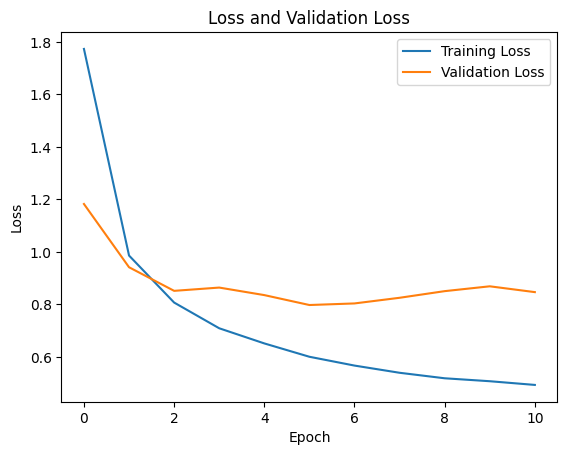

In [21]:
import matplotlib.pyplot as plt

# Plot the loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
model.save('ge_BiLSTM.h5')
np.save("X_test_BiLSTM.npy", X_test)
np.save("y_test_BiLSTM.npy", y_test)

In [23]:
from tensorflow.keras.models import load_model
import numpy as np

model = load_model('ge_BiLSTM.h5')
X_test = np.load("X_test_BiLSTM.npy")
y_test = np.load("y_test_BiLSTM.npy")

# Avaliação de Resultados

In [24]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Acurácia final:', accuracy)

Acurácia final: 0.7809500694274902


In [25]:
# Fazer as previsões do modelo para o conjunto de teste
y_pred = model.predict(X_test)

896/896 [==============================] - 48s 52ms/step


In [26]:
#Transformar as previsões de volta em rótulos
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Calcular a matriz de confusão
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true_labels, y_pred_labels)

conf_mat

array([[1267,    3,    8,    5,    9,   12,    7,   17,   71,    6,   19,
          15,    7,    3,   10,   85,   21,    1,   24,    1,    3],
       [   7,  412,    3,    0,   13,    6,   16,    7,    2,    4,    2,
           4,    5,   53,    4,   45,    6,    3,   10,    4,    6],
       [  17,    3, 1152,    4,   15,    6,    9,   20,    5,   56,   34,
           8,   10,    4,    8,   73,   17,    6,   20,    2,    3],
       [   5,    1,    4,  819,   11,    5,   23,    7,    0,   16,    5,
           4,    9,    3,    8,   51,   10,    4,   18,    8,    4],
       [  20,    4,    6,    8, 1183,    3,    4,   18,    6,   46,   32,
          36,    9,    6,    9,   70,    9,   12,   30,    3,   29],
       [   4,    1,    3,    5,    3,  395,    8,   11,    3,    0,    4,
           3,    3,    5,    1,   42,    9,    4,   15,    2,    0],
       [   8,    2,    7,    8,    8,    5,  669,   12,    3,    7,    8,
           9,   87,   11,    5,   56,   14,    3,    4,    5,    6],

In [27]:
import pandas as pd

classes = df['label'].nunique()

# Lê o arquivo .csv
df = pd.read_pickle("ge.pkl")

df.shape[0]

191005

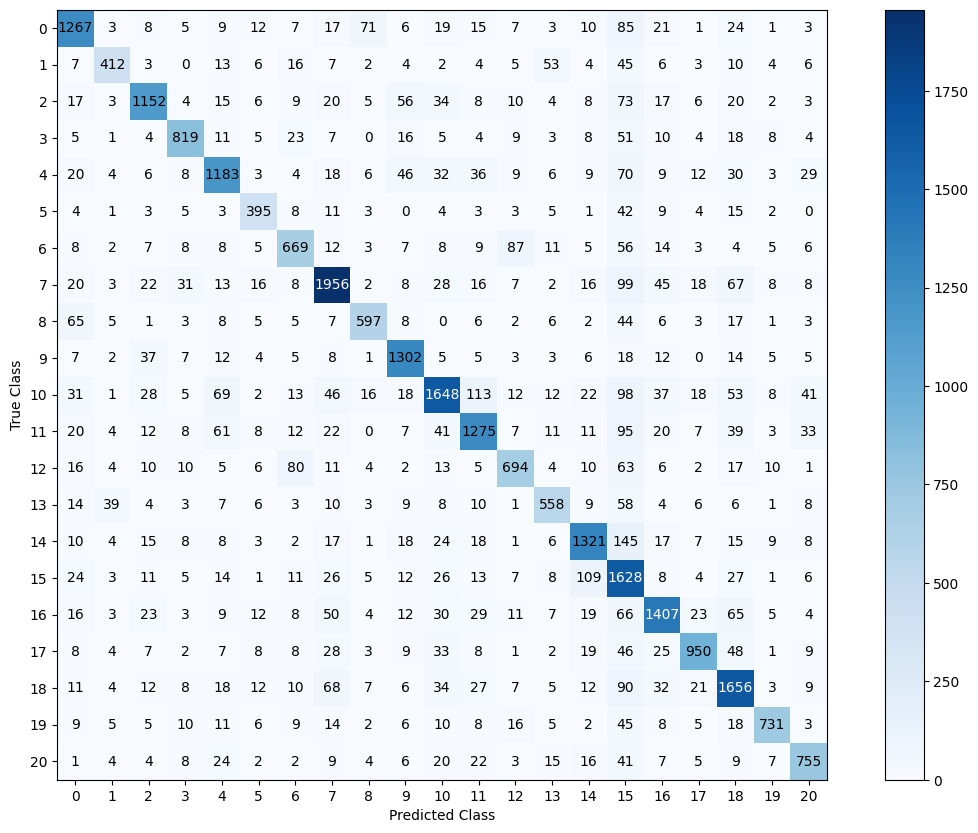

In [28]:
import matplotlib.pyplot as plt

# Define size of the figure
plt.figure(figsize=(15, 10))

# Define colormap
cmap = plt.cm.Blues

# Plot confusion matrix
plt.imshow(conf_mat, cmap=cmap)
plt.colorbar()

# Add labels to matrix
plt.xticks([int(i) for i in range(21)], [str(i) for i in range(21)])
plt.yticks([int(i) for i in range(21)], [str(i) for i in range(21)])

for i in range(classes):
    for j in range(classes):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='white' if conf_mat[i, j] > len(y_true_labels)/ classes else 'black')

# Add axis labels
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Show plot
plt.show()

In [29]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall and f1-score for each class
precisions = []
recalls = []
f1_scores = []
for i in range(classes):
    precision = precision_score(y_true=y_true_labels == i, y_pred=y_pred_labels == i, zero_division=0)
    recall = recall_score(y_true=y_true_labels == i, y_pred=y_pred_labels == i, zero_division=0)
    f1 = f1_score(y_true=y_true_labels == i, y_pred=y_pred_labels == i, zero_division=0)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
# Print results
for i in range(classes):
    print(f"Class '{i}': Precision={precisions[i]:.4f}, Recall={recalls[i]:.4f}, F1-Score={f1_scores[i]:.4f}")

Class '0': Precision=0.8019, Recall=0.7949, F1-Score=0.7984
Class '1': Precision=0.8063, Recall=0.6732, F1-Score=0.7337
Class '2': Precision=0.8384, Recall=0.7826, F1-Score=0.8096
Class '3': Precision=0.8531, Recall=0.8069, F1-Score=0.8294
Class '4': Precision=0.7845, Recall=0.7667, F1-Score=0.7755
Class '5': Precision=0.7553, Recall=0.7582, F1-Score=0.7567
Class '6': Precision=0.7336, Recall=0.7140, F1-Score=0.7236
Class '7': Precision=0.8274, Recall=0.8174, F1-Score=0.8224
Class '8': Precision=0.8078, Recall=0.7519, F1-Score=0.7789
Class '9': Precision=0.8357, Recall=0.8912, F1-Score=0.8625
Class '10': Precision=0.8142, Recall=0.7193, F1-Score=0.7638
Class '11': Precision=0.7803, Recall=0.7518, F1-Score=0.7658
Class '12': Precision=0.7694, Recall=0.7133, F1-Score=0.7403
Class '13': Precision=0.7654, Recall=0.7275, F1-Score=0.7460
Class '14': Precision=0.8159, Recall=0.7972, F1-Score=0.8065
Class '15': Precision=0.5504, Recall=0.8353, F1-Score=0.6635
Class '16': Precision=0.8180, Reca

# Teste com um exemplo real (Flamengo)

In [34]:
# Criei um dataframe simples e com uma notícia só apenas por conta da função preprocess_data

import pandas as pd
from nltk.tokenize import word_tokenize

value = """Santos diz que grupo do Flamengo na Libertadores é difícil e mira tetracampeonato 

Flamengo desfruta de dias livres para treinar com foco na final do Campeonato Carioca, mas também já mira a estreia na Libertadores. A estreia na competição continental acontece na próxima quarta-feira, entre as finais do Estadual. 

O primeiro jogo será em Quito, no Equador, contra o Aucas, e o goleiro Santos comentou o desejo do Rubro-Negro em conquistar o tetracampeonato na Libertadores. 

- A expectativa é sempre muito boa para que essa competição comece. É a principal competição do nosso continente. O grupo é muito difícil, a gente sabe a dificuldade que é a Libertadores. Cada time teve a sua dificuldade para se classificar. A gente está vivendo uma expectativa boa para a estreia, queremos fazer uma boa competição em busca do objetivo que é ser campeão mais uma vez. 

Mas, antes de focar na estreia da Libertadores, o Flamengo disputa a primeira partida da final com o Fluminense, no sábado. Para o goleiro, o tempo para treinar em meio ao calendário apertado do futebol brasileiro é algo a ser valorizado.

- Semana muito boa com essa pausa para treinarmos. Estamos muito focados nessa decisão. Os treinos estão com muita intensidade e a gente tem aproveitado o máximo possível para chegarmos preparados.

O Flamengo é o atual campeão da Libertadores e luta pelo tetracampeonato. No Carioca, o Rubro-Negro tenta a revanche em cima do Fluminense, que terminou campeão na temporada de 2022. O segundo e decisivo jogo do Estadual acontece no domingo, dia 9.
"""

# Crie um DataFrame com uma linha e a coluna 'data'
df_predict = pd.DataFrame(data={'data': [value]})

#fazendo pré-processamento
preprocess_text(df_predict, 'data')

# Extract tokenized documents from the 'data' column
preprocessed_articles = df_predict['data'].tolist()

# Convert tokenized news into sequences of indices
sequences_test = []
for tokens in tqdm(preprocessed_articles):
    sequence = []
    for token in tokens:
        if token in word_to_index:
            sequence.append(word_to_index[token])
    sequences_test.append(sequence)
    
# Pad sequences
padded_example = pad_sequences(sequences_test, maxlen=max_length, padding='post')

# Fazer a previsão usando o modelo
predictions = model.predict(padded_example)

Removendo pontuação...


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 2481.84it/s]


Aplicando tokenização...


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 198.29it/s]


Removendo stopwords...


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 2231.01it/s]


Computando Lematização...


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 7169.75it/s]

1/1 [==============================] - 0s 65ms/step


In [35]:
predictions

array([[3.7455718e-06, 2.2723048e-06, 1.2247673e-04, 1.4909331e-06,
        9.8122946e-05, 1.7928775e-06, 1.9480590e-06, 6.3619968e-06,
        3.1188090e-05, 7.7856621e-06, 9.9805522e-01, 4.9202703e-04,
        1.2899807e-05, 8.4481453e-06, 4.1493163e-06, 3.3402343e-06,
        1.8402097e-05, 2.7687962e-05, 1.9791292e-04, 9.5783635e-06,
        8.9327089e-04]], dtype=float32)

In [36]:
# Identificar a classe com a maior probabilidade
predicted_class = np.argmax(predictions)

# Exibir a classe prevista
print(f"Classe prevista: {predicted_class}")

Classe prevista: 10


# Transformando a classe numérica em texto, de volta

In [37]:
from sklearn.preprocessing import LabelEncoder

# Lê o arquivo .csv
df = pd.read_csv('ge_news.csv')

# Cria um objeto LabelEncoder
le = LabelEncoder()

df['label'] = le.fit_transform(df['club'])

original_class = le.inverse_transform([predicted_class])
print(f"Classe original: {original_class[0]}")

Classe original: flamengo


# Teste com um exemplo real (Corinthians)

In [38]:
# Criei um dataframe simples e com uma notícia só apenas por conta da função preprocess_data

import pandas as pd

value = """Nova camisa do Corinthians: vazam imagens de supostos uniformes para 2023; veja fotos

Imagens de supostas novas camisas do Corinthians para 2023 vazaram nas redes sociais nessa quarta-feira. Foram divulgadas fotos do que seriam os modelos 1 e 2 do uniforme do Timão.

Uma loja de um shopping na Zona Sul de São Paulo já está comercializando as novas camisas branca e listrada. A reportagem do ge entrou em contato com o estabelecimento e teve a confirmação de um funcionário de que as peças já estão à venda por R$ 300 (modelo de torcedor). Confira as imagens abaixo:

As supostas novas camisas do Corinthians para 2023 possui detalhes na cor vermelha ao redor da logomarca da Nike, fornecedora do material esportivo do clube.

Os uniformes alvinegros para este ano homenagearão a Democracia Corinthiana, movimento organizado na década de 1980. CLIQUE AQUI e saiba mais sobre o tema.

Usualmente, o Corinthians lança seus novos uniformes principais entre o fim de abril e o início de maio. Já a terceira camisa costuma ser estreada em setembro, mês de aniversário do clube. 

O Timão volta a campo na próxima quinta-feira, na estreia da Libertadores, contra o Liverpool-URU, às 19h, no estádio Centenário de Montevidéu. 
"""

# Crie um DataFrame com uma linha e a coluna 'data'
df_predict = pd.DataFrame(data={'data': [value]})

#fazendo pré-processamento
preprocess_text(df_predict, 'data')

# Extract tokenized documents from the 'data' column
preprocessed_articles = df_predict['data'].tolist()

# Convert tokenized news into sequences of indices
sequences_test = []
for tokens in tqdm(preprocessed_articles):
    sequence = []
    for token in tokens:
        if token in word_to_index:
            sequence.append(word_to_index[token])
    sequences_test.append(sequence)
    
# Pad sequences
padded_example = pad_sequences(sequences_test, maxlen=max_length, padding='post')

# Fazer a previsão usando o modelo
predictions = model.predict(padded_example)

Removendo pontuação...


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 2704.26it/s]


Aplicando tokenização...


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 505.95it/s]


Removendo stopwords...


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 2584.29it/s]


Computando Lematização...


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 7854.50it/s]

1/1 [==============================] - 0s 56ms/step


In [39]:
# Identificar a classe com a maior probabilidade
predicted_class = np.argmax(predictions)

# Exibir a classe prevista
print(f"Classe prevista: {predicted_class}")

Classe prevista: 7


In [40]:
from sklearn.preprocessing import LabelEncoder

# Lê o arquivo .csv
df = pd.read_csv('ge_news.csv')

# Cria um objeto LabelEncoder
le = LabelEncoder()

df['label'] = le.fit_transform(df['club'])

original_class = le.inverse_transform([predicted_class])
print(f"Classe original: {original_class[0]}")

Classe original: corinthians


## Referências

* https://www.kaggle.com/datasets/lgmoneda/ge-soccer-clubs-news
* https://medium.com/@everton.tomalok/word2vec-e-sua-import%C3%A2ncia-na-etapa-de-pr%C3%A9-processamento-d0813acfc8ab
* https://www.youtube.com/watch?v=hQwFeIupNP0
* https://www.youtube.com/watch?v=ISPId9Lhc1g
* https://jalammar.github.io/illustrated-word2vec/
* https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92